<font color="maroon" size="6"><center><b>Mobile Price Prediction(Classification Algorithm)</b></center></font>
<font color="Royalblue" size="4"><center>Owner: Sushant Borade</center></font>
<font color="Royalblue" size="4"><center>Mail ID: sushant.9196@gmail.com</center></font>

<font size="4" color="green"><b>Loading All Package</b></font>

In [1]:
import pandas as pd
import os as os
import numpy as np

#Visuals
import matplotlib.pyplot as plt
import seaborn as sns

#Pre-processing
from sklearn.preprocessing import StandardScaler
from scipy.stats import chi2_contingency
import scipy.stats as stats

# To split data
from sklearn.model_selection import train_test_split

# Model Building
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier


# Testing Model 
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix

import warnings
warnings.filterwarnings("ignore")

<font size="4" color="green"><b>User Defined Function</b></font>

In [13]:
def HeatMap(df):
    corr = df.corr()
    mask = np.zeros_like(corr)
    mask[np.triu_indices_from(mask)] = True
    f, ax = plt.subplots(figsize=(18, 9))        # Sample figsize in inches
    sns.heatmap(corr,annot=True ,linewidths=.10,ax=ax,cmap='YlGnBu',mask=mask, vmin = -1,vmax=1,)
    bottom, top = ax.get_ylim()
    #print("Bottom is ",bottom,"After adding",bottom+0.5)
    #print("TOp is ",top,"After adding",top-0.5)
    ax.set_ylim(bottom + 0.5, top - 0.5)

<font size="4" color="green"><b>Loading DatSet</b></font>

In [2]:
#Load the dataSet
filepath = "F:\github"
filename = "Mob_Train.csv"

data = pd.read_csv(os.path.join(filepath, filename))

In [3]:
data.head() #Top 5 rows`

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,0,2.2,0,1,0,7,0.6,188,2,...,20,756,2549,9,7,19,0,0,1,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,...,905,1988,2631,17,3,7,1,1,0,2
2,563,1,0.5,1,2,1,41,0.9,145,5,...,1263,1716,2603,11,2,9,1,1,0,2
3,615,1,2.5,0,0,0,10,0.8,131,6,...,1216,1786,2769,16,8,11,1,0,0,2
4,1821,1,1.2,0,13,1,44,0.6,141,2,...,1208,1212,1411,8,2,15,1,1,0,1


In [4]:
data.tail() #Bottom 5 rows

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
1995,794,1,0.5,1,0,1,2,0.8,106,6,...,1222,1890,668,13,4,19,1,1,0,0
1996,1965,1,2.6,1,0,0,39,0.2,187,4,...,915,1965,2032,11,10,16,1,1,1,2
1997,1911,0,0.9,1,1,1,36,0.7,108,8,...,868,1632,3057,9,1,5,1,1,0,3
1998,1512,0,0.9,0,4,1,46,0.1,145,5,...,336,670,869,18,10,19,1,1,1,0
1999,510,1,2.0,1,5,1,45,0.9,168,6,...,483,754,3919,19,4,2,1,1,1,3


In [6]:
data.nunique()

battery_power    1094
blue                2
clock_speed        26
dual_sim            2
fc                 20
four_g              2
int_memory         63
m_dep              10
mobile_wt         121
n_cores             8
pc                 21
px_height        1137
px_width         1109
ram              1562
sc_h               15
sc_w               19
talk_time          19
three_g             2
touch_screen        2
wifi                2
price_range         4
dtype: int64

<font size="4" color="green"><b> If there are more no of unique variable than it is continous and if there are very less unique no the categorical</b></font>

In [7]:
numerical = ["battery_power", "clock_speed", "fc", "int_memory", "m_dep", "mobile_wt", "pc", "px_height",
             "px_width", "ram", "sc_h", "sc_w", "talk_time"]
categorical = ["blue", "dual_sim", "four_g", "n_cores", "three_g", "touch_screen", "wifi"]

In [10]:
data.shape #No of Rows, No of Columns

(2000, 21)

In [11]:
data.columns #To find COlumn names

Index(['battery_power', 'blue', 'clock_speed', 'dual_sim', 'fc', 'four_g',
       'int_memory', 'm_dep', 'mobile_wt', 'n_cores', 'pc', 'px_height',
       'px_width', 'ram', 'sc_h', 'sc_w', 'talk_time', 'three_g',
       'touch_screen', 'wifi', 'price_range'],
      dtype='object')

<font size="4" color="green"><b>Check For missing values</b></font>

In [12]:
data.isnull().sum()  # Missing values

battery_power    0
blue             0
clock_speed      0
dual_sim         0
fc               0
four_g           0
int_memory       0
m_dep            0
mobile_wt        0
n_cores          0
pc               0
px_height        0
px_width         0
ram              0
sc_h             0
sc_w             0
talk_time        0
three_g          0
touch_screen     0
wifi             0
price_range      0
dtype: int64

<font size="4" color="green"><b>Lucky !! No missing data :)</b></font>

<font color="blue" size="4"><b>Correlation Using Heatmap</b></font>

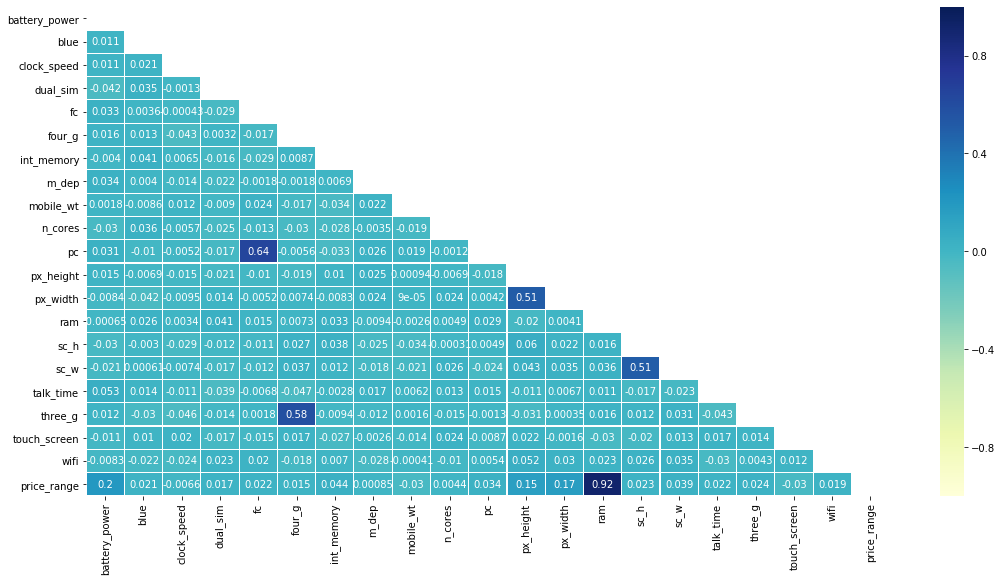

In [15]:
HeatMap(data)

<font size="4" color="red"><b> Thus we can see that Some input feature shows collinearity between them</b></font>

<font color="maroon" size="4"><b>Box plot to see relation between Continous input feature and price range which is categorical, We will check if mean of all categories are somewhat same or not </b></font>

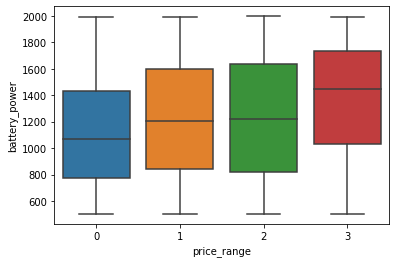

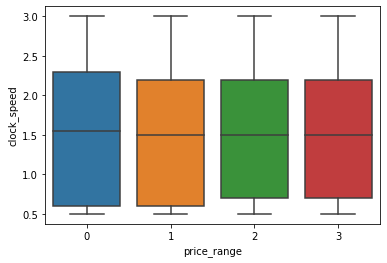

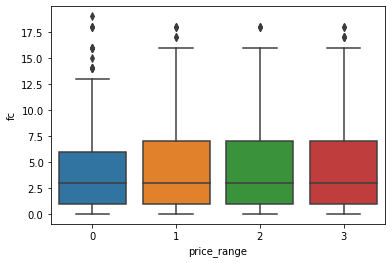

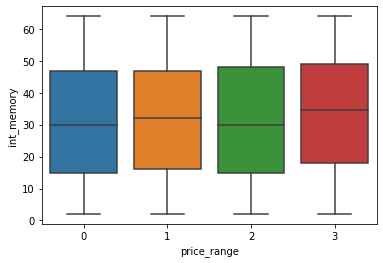

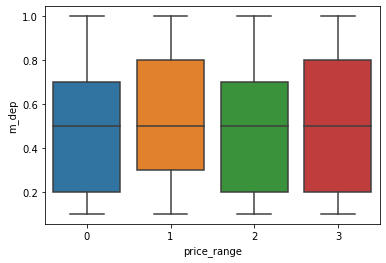

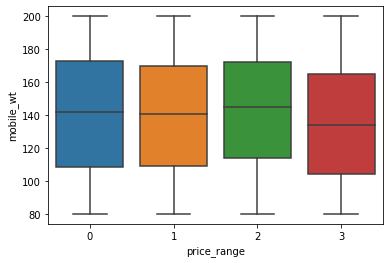

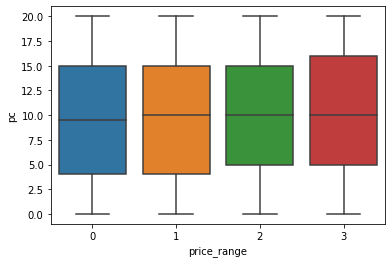

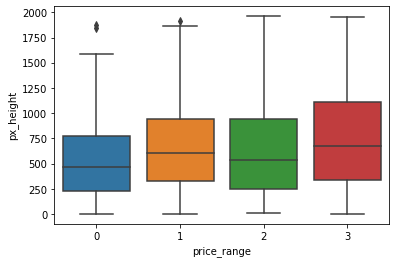

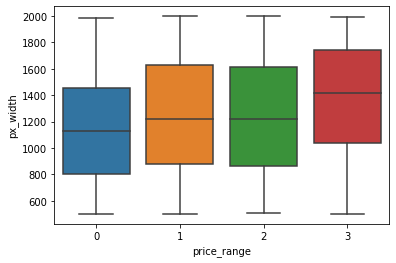

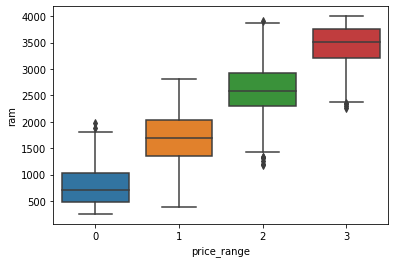

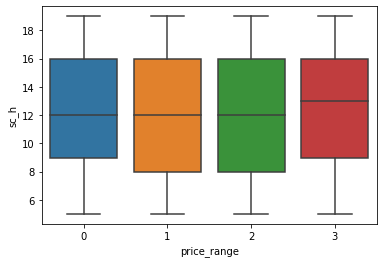

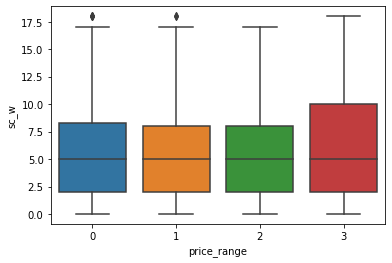

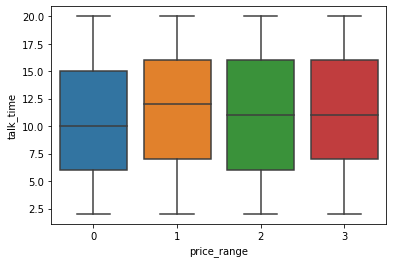

In [16]:
for col in numerical:
    sns.boxplot(x = "price_range", y =  col, data = data)
    plt.show()

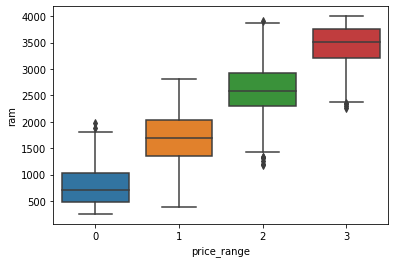

In [17]:
sns.boxplot(x = "price_range", y =  "ram", data = data)

<font size="4" color="green"><b>RAM seems most important feature for price Range, Then Battery power and pixel width also seems to be important for price Range</b></font>

<font color="maroon" size="4"><b>Chi Square Test to see relation between Categorical input feature and price range</b></font>

In [19]:
categorical

['blue', 'dual_sim', 'four_g', 'n_cores', 'three_g', 'touch_screen', 'wifi']

In [20]:
for col in categorical:
    table = pd.pivot_table(data, columns = "price_range", index = col, aggfunc='count', values = "ram")
    stat, p, dof, expected = chi2_contingency(table)
    if p < 0.05:
        print(col + ': Dependent')
    else:
        print(col + ': Independent')

blue: Independent
dual_sim: Independent
four_g: Independent
n_cores: Independent
three_g: Independent
touch_screen: Independent
wifi: Independent


<font size="4" color="green"><b>Non of the Categorcal feature seems important for price Range</b></font>

<font size="4" color="blue"><b>Train Test Split</b></font>

In [21]:
# Give Input
X = data[["ram", "battery_power", "px_width"]]  #data.drop("price_range", axis = 1) #
y = data[["price_range"]]

#sc = StandardScaler()
#X = sc.fit_transform(X_in)
#X = pd.DataFrame(X, columns = X_in.columns)

# Split the data for train and test 
X_train, X_test, y_train, y_test = train_test_split(X, y , train_size = 0.8, random_state = 100)   # 70-30 Split

<font size="6" color="maroon"><b><center><u>Model 1: Decision Tree</u></center></b></font>

In [22]:
dt = DecisionTreeClassifier(max_depth = 3)
dt = dt.fit(X_train, y_train)

In [23]:
# Predicting on Train Data
X_train_op = X_train.copy()
X_train_op["y_train_actuals"] = y_train["price_range"]
X_train_op["y_train_predict"] = dt.predict(X_train)

In [24]:
#Predicting on Test Data
X_test_op = X_test.copy()
X_test_op["y_test_actuals"] = y_test["price_range"]
X_test_op["y_test_predict"] = dt.predict(X_test)

In [25]:
# Accuracy on Train data
train_acc = accuracy_score(X_train_op["y_train_actuals"], X_train_op["y_train_predict"]) *100 # Accuarcy using package
print ("Accuracy on Train data: ", train_acc)

Accuracy on Train data:  76.9375


In [26]:
# Accuracy on Test data
test_acc = accuracy_score(X_test_op["y_test_actuals"], X_test_op["y_test_predict"]) *100 # Accuarcy using package
print ("Accuracy on Test data: ", test_acc)

Accuracy on Test data:  73.5


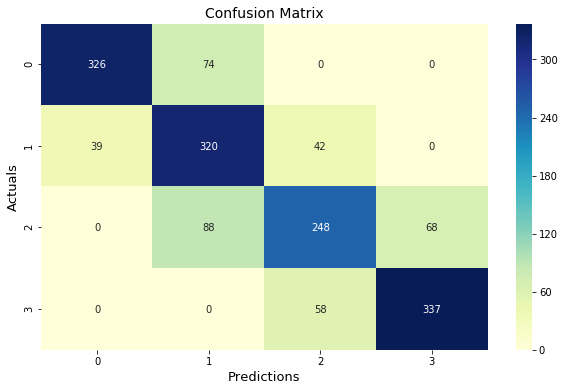

In [31]:
cnf_matrix = confusion_matrix(X_train_op["y_train_actuals"], X_train_op["y_train_predict"])
f, ax = plt.subplots(figsize=(10, 6))        # Sample figsize in inches
sns.heatmap(cnf_matrix, annot = True,ax=ax, cmap = "YlGnBu", fmt='.3g')
bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top - 0.5)
plt.ylabel("Actuals", fontsize = 13)
plt.xlabel("Predictions", fontsize = 13)
plt.title("Confusion Matrix", fontsize = 14)
plt.show()

In [32]:
from sklearn.tree import plot_tree

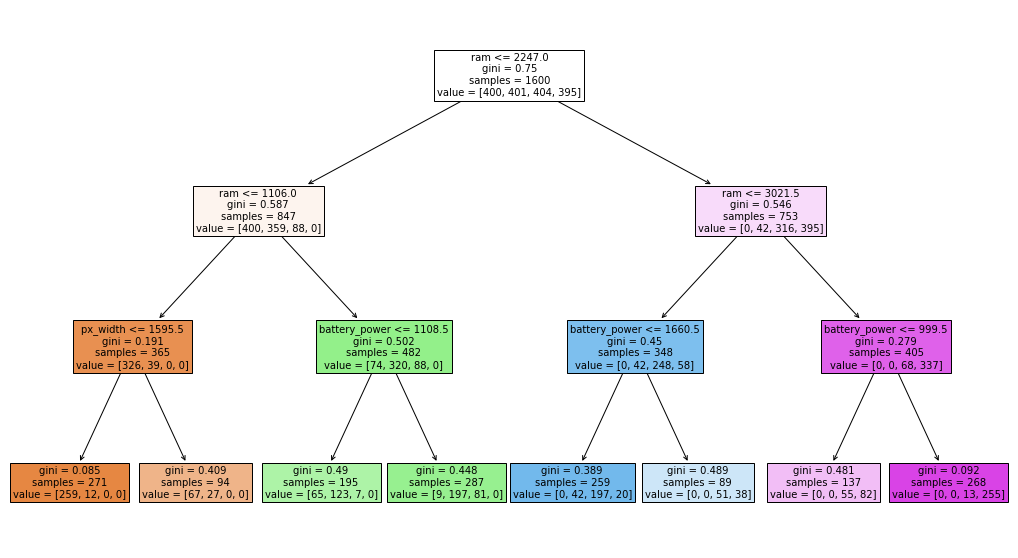

In [33]:
plt.figure(figsize = (18,10))
plot_tree(dt, filled=True, fontsize = 10, feature_names = X_train.columns.tolist())
plt.show()

<font size="6" color="maroon"><b><center><u>Model 2: Random Forest</u></center></b></font>

In [34]:
# Model building
rf = RandomForestClassifier(max_depth = 4)
rf = rf.fit(X_train, y_train)

In [35]:
# Predicting on Train Data
X_train_op = X_train.copy()
X_train_op["y_train_actuals"] = y_train["price_range"]
X_train_op["y_train_predict"] = rf.predict(X_train)

In [36]:
#Predicting on Test Data
X_test_op = X_test.copy()
X_test_op["y_test_actuals"] = y_test["price_range"]
X_test_op["y_test_predict"] = rf.predict(X_test)

In [37]:
# Accuracy on Train data
train_acc = accuracy_score(X_train_op["y_train_actuals"], X_train_op["y_train_predict"]) *100 # Accuarcy using package
print ("Accuracy on Train data: ", train_acc)

Accuracy on Train data:  82.0


In [38]:
# Accuracy on Test data
test_acc = accuracy_score(X_test_op["y_test_actuals"], X_test_op["y_test_predict"]) *100 # Accuarcy using package
print ("Accuracy on Test data: ", test_acc)

Accuracy on Test data:  77.0


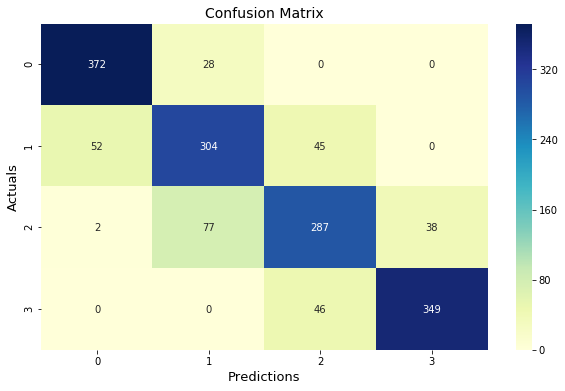

In [39]:
cnf_matrix = confusion_matrix(X_train_op["y_train_actuals"], X_train_op["y_train_predict"])
f, ax = plt.subplots(figsize=(10, 6))        # Sample figsize in inches
sns.heatmap(cnf_matrix, annot = True,ax=ax, cmap = "YlGnBu", fmt='.3g')
bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top - 0.5)
plt.ylabel("Actuals", fontsize = 13)
plt.xlabel("Predictions", fontsize = 13)
plt.title("Confusion Matrix", fontsize = 14)
plt.show()

<font size="4" color="green"><b>Feature Importance</b></font>

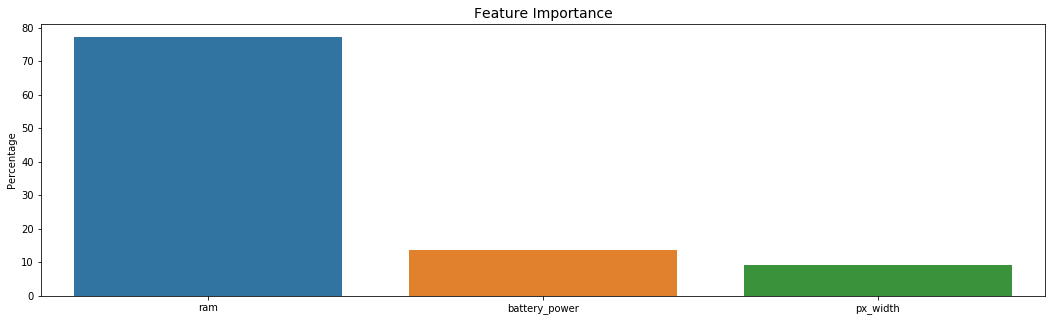

In [40]:
plt.figure(figsize = (18,5))
sns.barplot(X_train.columns.tolist(), rf.feature_importances_*100)
plt.title("Feature Importance", fontsize = 14)
plt.ylabel("Percentage")
plt.show()

<font size="4" color="green"><b>Thus RAM is most important Feature then Battery power and then pixel width</b></font>

<font size="6" color="maroon"><b><center><u>Model 3: KNN </u></center></b></font>

In [42]:
# Give Input
X_in = data[["ram", "battery_power", "px_width"]]  #data.drop("price_range", axis = 1) #
y = data[["price_range"]]

sc = StandardScaler()
X = sc.fit_transform(X_in)
X = pd.DataFrame(X, columns = X_in.columns)

# Split the data for train and test 
X_train, X_test, y_train, y_test = train_test_split(X, y , train_size = 0.8, random_state = 100)   # 70-30 Split

In [44]:
knn = KNeighborsClassifier(n_neighbors=7)  
knn = knn.fit(X_train, y_train)

In [45]:
# Predicting on Train Data
X_train_op = X_train.copy()
X_train_op["y_train_actuals"] = y_train["price_range"]
X_train_op["y_train_predict"] = knn.predict(X_train)

In [46]:
#Predicting on Test Data
X_test_op = X_test.copy()
X_test_op["y_test_actuals"] = y_test["price_range"]
X_test_op["y_test_predict"] = knn.predict(X_test)

In [47]:
# Accuracy on Train data
train_acc = accuracy_score(X_train_op["y_train_actuals"], X_train_op["y_train_predict"]) *100 # Accuarcy using package
print ("Accuracy on Train data: ", train_acc)

Accuracy on Train data:  91.0


In [48]:
# Accuracy on Test data
test_acc = accuracy_score(X_test_op["y_test_actuals"], X_test_op["y_test_predict"]) *100 # Accuarcy using package
print ("Accuracy on Test data: ", test_acc)

Accuracy on Test data:  86.75


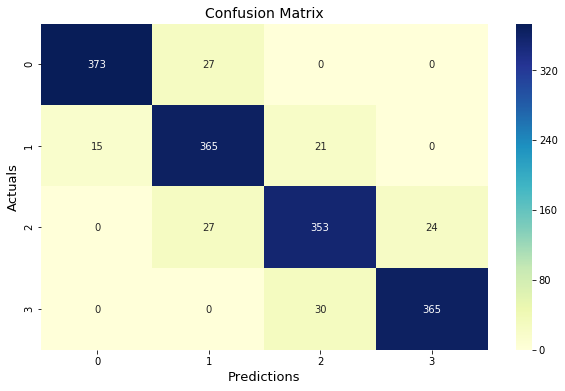

In [49]:
cnf_matrix = confusion_matrix(X_train_op["y_train_actuals"], X_train_op["y_train_predict"])
f, ax = plt.subplots(figsize=(10, 6))        # Sample figsize in inches
sns.heatmap(cnf_matrix, annot = True,ax=ax, cmap = "YlGnBu", fmt='.3g')
bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top - 0.5)
plt.ylabel("Actuals", fontsize = 13)
plt.xlabel("Predictions", fontsize = 13)
plt.title("Confusion Matrix", fontsize = 14)
plt.show()

<font size="4" color="green"><b>Conclusing Statement</b></font>

  We can conclude that from Above three algorithm KNN is most effective algorithm for mobile price prediction(classification) giving an train accuarcy of 91% and test accuracy of 86%